In [51]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import seaborn as sn

In [52]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [53]:
# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0


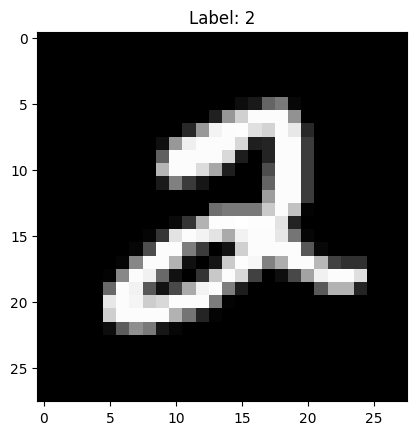

In [54]:
index = 5
plt.imshow(x_train[index], cmap="gray")
plt.title(f"Label: {y_train[index]}")
plt.show()

In [55]:
# Step 3: Flatten the images (if using Dense layers)
x_train = x_train.reshape(len(x_train), 28 * 28)  # Reshape to (60000, 784)
x_test = x_test.reshape(len(x_test), 28 * 28)

In [56]:
# Step 4: Build the model
from tensorflow.keras import layers
model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(784,)),  # Hidden layer
    keras.layers.Dense(64, activation="sigmoid"),
    keras.layers.Dense(32, activation="sigmoid"),
    keras.layers.Dense(10, activation="softmax")                    # Output layer (10 classes)
])


In [57]:
# Step 5: Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [58]:
# Step 6: Train the model
history = model.fit(
    x_train, y_train,
    epochs=10
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7867 - loss: 0.9055
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9608 - loss: 0.1438
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9742 - loss: 0.0903
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9825 - loss: 0.0613
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9879 - loss: 0.0445
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9906 - loss: 0.0344
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9921 - loss: 0.0283
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9934 - loss: 0.0228
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9951 - loss: 0.0180
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9961 - loss: 0.0141


In [62]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9759 - loss: 0.0932


[0.08089565485715866, 0.9793999791145325]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Number of incorrect predictions: 206


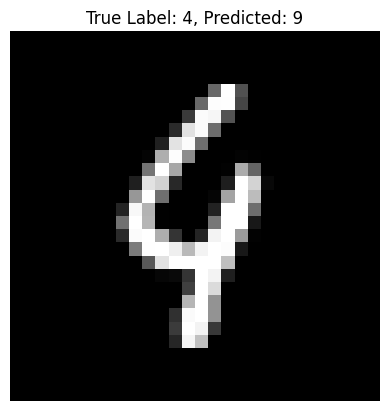

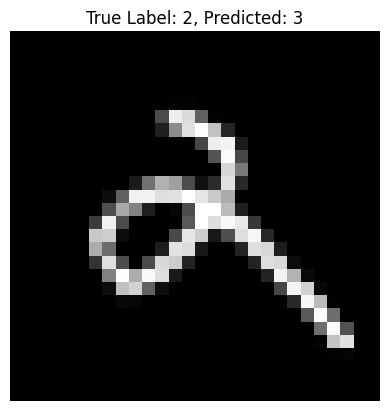

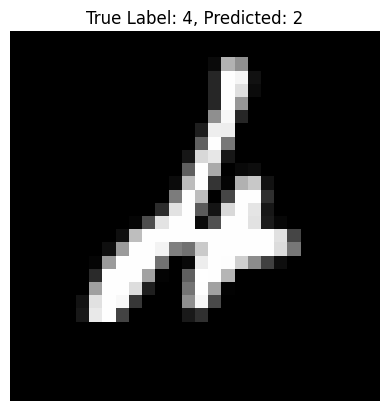

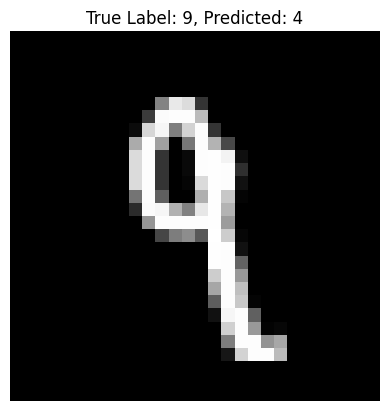

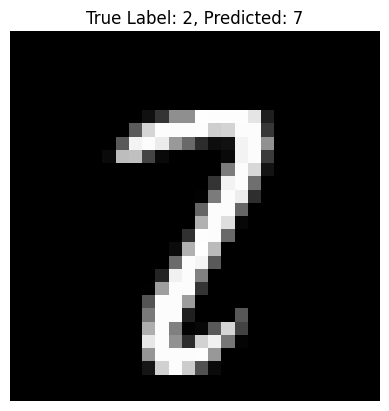

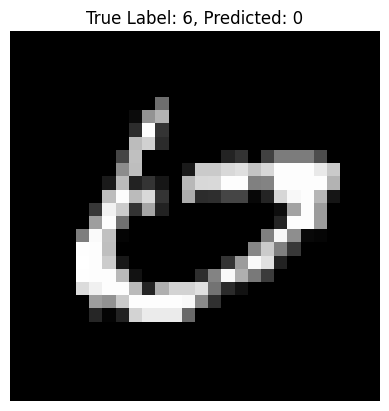

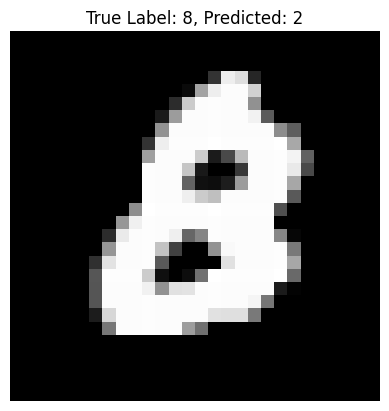

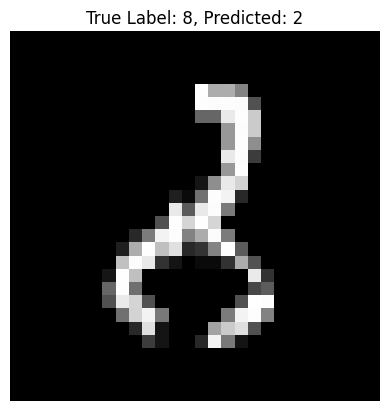

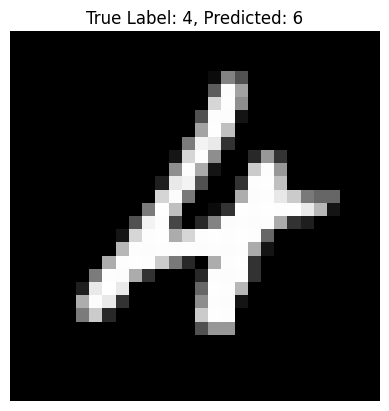

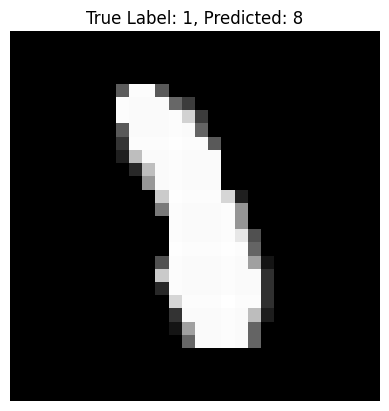

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Get predictions for the test set
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

# Step 2: Find incorrect predictions
incorrect_indices = np.where(predicted_labels != y_test)[0]  # Indices where prediction != true label

print(f"Number of incorrect predictions: {len(incorrect_indices)}")

# Step 3: Visualize incorrect predictions
for i, idx in enumerate(incorrect_indices[:10]):  # Display the first 10 incorrect samples
    plt.imshow(x_test[idx].reshape(28, 28), cmap="gray")
    plt.title(f"True Label: {y_test[idx]}, Predicted: {predicted_labels[idx]}")
    plt.axis("off")
    plt.show()
